In [1]:
import pandas as pd
import numpy as np
import seaborn as sd
import json

In [2]:
with open('C:/Users/Saad/Downloads/archive/profiles.json') as f:  # load json file
    data = json.load(f)

In [3]:
len(data['profiles'])

16

In [4]:
data['profiles'][2]['car']

{'id': 51,
 'license_plate': 'WU7944J',
 'brand': 'TOYOTA',
 'model': 'RAV4',
 'production_year': 2019,
 'data_source': 'dfm'}

In [5]:
data['profiles'][15]['trips'][15]

{'driver': {'id': 52,
  'first_name': 'Aneta',
  'last_name': 'Kerner',
  'gender': 'female'},
 'distance': 60.8453643213119,
 'start_location': {'latitude': 52.689518697540926,
  'longitude': 20.252230944619345},
 'start_time': '2021-06-24T09:37:35Z',
 'end_time': '2021-06-24T10:24:01Z',
 'last_break': 61576,
 'best_available_short': None,
 'is_home': True,
 'is_work': False,
 'can_recharge': True}

In [6]:
for profile in data['profiles']:
    for trip in profile['trips']:
        trip['car_license_plate'] = profile['car']['license_plate']

In [7]:
trip_data = [
    trip for profile in data['profiles'] for trip in profile['trips']
]

In [8]:
len(trip_data) 

1756

In [9]:
trip_data[20]

{'driver': {'id': 62,
  'first_name': 'Dorota',
  'last_name': 'Mańkowska',
  'gender': 'female'},
 'distance': 1.61836996423968,
 'start_location': {'latitude': 52.15000112730822,
  'longitude': 21.05363942651425},
 'start_time': '2021-06-25T08:39:48Z',
 'end_time': '2021-06-25T08:44:31Z',
 'last_break': 455,
 'best_available_short': None,
 'is_home': False,
 'is_work': False,
 'can_recharge': True,
 'car_license_plate': 'WI361HF'}

In [10]:
for t in trip_data:  # Re-structuring data for pandas import
    t['driver'] = t['driver']['id']
    t['latitude'] = t['start_location']['latitude']
    t['longitude'] = t['start_location']['longitude']
    t.pop('start_location')

In [11]:
trip_data[0]

{'driver': 62,
 'distance': 37.4503324547605,
 'start_time': '2021-06-29T12:54:41Z',
 'end_time': '2021-06-29T13:58:33Z',
 'last_break': 124,
 'best_available_short': None,
 'is_home': False,
 'is_work': False,
 'can_recharge': True,
 'car_license_plate': 'WI361HF',
 'latitude': 52.14920234483962,
 'longitude': 21.055473350109075}

In [12]:
trips_df = pd.DataFrame.from_dict(trip_data)
trips_df.head()

,driver,distance,start_time,end_time,last_break,best_available_short,is_home,is_work,can_recharge,car_license_plate,latitude,longitude
0,62,37.450332,2021-06-29T12:54:41Z,2021-06-29T13:58:33Z,124,None,False,False,True,WI361HF,52.149202,21.055473
1,62,1.287687,2021-06-29T12:47:19Z,2021-06-29T12:52:37Z,14380,None,False,False,True,WI361HF,52.142642,21.053358
2,62,1.188009,2021-06-29T08:43:25Z,2021-06-29T08:47:39Z,1711,None,False,False,True,WI361HF,52.149121,21.055582
3,62,1.289794,2021-06-29T08:08:36Z,2021-06-29T08:14:54Z,53180,None,True,False,True,WI361HF,52.142666,21.053435
4,62,1.159372,2021-06-28T17:17:53Z,2021-06-28T17:22:16Z,1874,None,False,False,True,WI361HF,52.149386,21.055213


In [13]:
##### Trips Average

In [14]:
trips_df['car_license_plate'].unique()

array(['WI361HF', 'WI090HP', 'WU7944J', 'WI483HF', 'WZ5957S', 'WZ5952S',
       'WU7441J', 'WI074HJ', 'WZ5956S', 'WT2661A', 'WI089HP', 'WU7451J',
       'WY4056L', 'WT4931A', 'WU7588J', 'WI480HF'], dtype=object)

### Stop Time

### Average Stop Time per car
Here, we group the dataframe by car using the groupby method

In [15]:
df_by_car = trips_df.groupby('car_license_plate')
df_by_car.last_break.mean() / 60

car_license_plate
WI074HJ     364.841919
WI089HP     108.808177
WI090HP     839.333681
WI361HF     541.134058
WI480HF    1826.002273
WI483HF     370.044548
WT2661A     546.320690
WT4931A     687.392262
WU7441J     160.004514
WU7451J     268.875779
WU7588J     480.142683
WU7944J     156.216328
WY4056L     328.395455
WZ5952S     516.488034
WZ5956S     185.900000
WZ5957S     478.349005
Name: last_break, dtype: float64

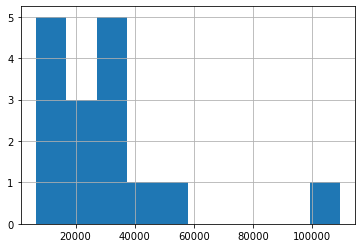

In [16]:
df_by_car.last_break.mean().hist()

### Average Stop time per day
In this case, we need to group the dataframe by date.

In [17]:
# Create a start date column how you did before
trips_df['start_date'] = trips_df['start_time'].str.slice(stop=10)

In [18]:
trips_df['start_date']

0       2021-06-29
1       2021-06-29
2       2021-06-29
3       2021-06-29
4       2021-06-28
           ...    
1751    2021-06-23
1752    2021-06-23
1753    2021-06-23
1754    2021-06-22
1755    2021-06-02
Name: start_date, Length: 1756, dtype: object

In [19]:
df_by_date = trips_df.groupby('start_date')
df_by_date.last_break.mean() / 60 # Average of all cars stop time per each different day

start_date
2021-06-01     53.394444
2021-06-02    165.920968
2021-06-03    339.016667
2021-06-04    167.016410
2021-06-05    315.268148
2021-06-06    339.672000
2021-06-07    306.418545
2021-06-08    273.321905
2021-06-09    331.973704
2021-06-10    225.091414
2021-06-11    389.237255
2021-06-12    353.994186
2021-06-13    576.166667
2021-06-14    338.385057
2021-06-15    371.192262
2021-06-16    344.069118
2021-06-17    231.712847
2021-06-18    473.426712
2021-06-19    269.355247
2021-06-20    472.265476
2021-06-21    343.644974
2021-06-22    717.611806
2021-06-23    212.284977
2021-06-24    217.854286
2021-06-25    240.530000
2021-06-26    418.083654
2021-06-27    321.880851
2021-06-28    385.783831
2021-06-29    425.490476
2021-06-30    258.117500
Name: last_break, dtype: float64

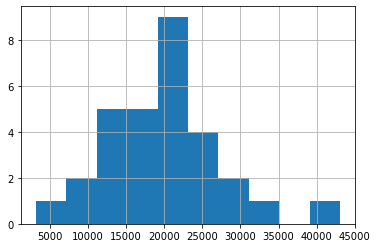

In [20]:
df_by_date.last_break.mean().hist() # This is in seconds

To show it in minutes or hours:

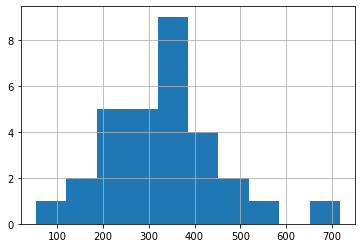

In [21]:
trips_df['last_break_minutes'] = trips_df['last_break'] / 60
trips_df['last_break_hours'] = trips_df['last_break'] / 60 / 60

df_by_date = trips_df.groupby('start_date')
df_by_date.last_break_minutes.mean().hist() # Same shape, different scale

In [22]:
trips_df["distance"]

0       37.450332
1        1.287687
2        1.188009
3        1.289794
4        1.159372
          ...    
1751    45.514643
1752    56.148723
1753     2.542226
1754    56.315483
1755     6.531418
Name: distance, Length: 1756, dtype: float64

### Number of trips per day
We can reuse the df grouped by date with the **size** method to get the number of observations for each separate date

In [23]:
df_by_date.size()

start_date
2021-06-01    69
2021-06-02    62
2021-06-03    48
2021-06-04    65
2021-06-05    45
2021-06-06    50
2021-06-07    71
2021-06-08    70
2021-06-09    45
2021-06-10    66
2021-06-11    68
2021-06-12    43
2021-06-13    22
2021-06-14    58
2021-06-15    56
2021-06-16    68
2021-06-17    48
2021-06-18    73
2021-06-19    54
2021-06-20    42
2021-06-21    63
2021-06-22    72
2021-06-23    71
2021-06-24    70
2021-06-25    75
2021-06-26    52
2021-06-27    47
2021-06-28    67
2021-06-29    56
2021-06-30    60
dtype: int64

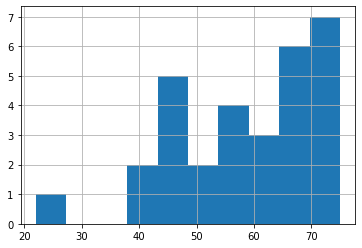

In [24]:
df_by_date.size().hist()  # Total trips per day